In [1]:
#!pip install trafilatura

In [2]:
import os

import numpy as np
import pandas as pd

from lxml import html
from bs4 import BeautifulSoup
import trafilatura

In [3]:
#!npx degit kelu124/substack/.archive substack --force

In [4]:
files = os.listdir('.archive')
file_names = []
for name in files:
    if not ('type' in name):
        file_names.append(name)

In [5]:
D = pd.read_parquet('articles.parquet.gzip')

In [6]:
DONE = list(D.file_name)

In [7]:
import io

In [8]:
articles = []
errors = []
for file_name in file_names:
    if file_name not in DONE:
        with io.open(f'.archive/{file_name}', mode="r", encoding="utf-8") as f:
            try:
                mytree = html.fromstring("".join(f.readlines()))
            except Exception as e:
                print(file_name,e)
                errors.append(file_name)
                continue
            try:
                content = trafilatura.extract(mytree)
                articles.append((file_name, content))
            except Exception as e:
                print(file_name,e)
                errors.append(file_name)

1adf22e202e6fbf70cab0817e9900a63 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
90ff840ab083c871304f6c064a686163 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
ae139bd8ae8643afb759fbac296ee6f9 'utf-8' codec can't decode byte 0xe2 in position 10: invalid continuation byte
f0a23dcd98c2fdf0a3fd523a04e7c255 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
679dc202eff2e27018dc9d59ef4ab209 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
14d1644363556a7c406cd6c2b4b824b1 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
d5d984108e1458c134b8b5d1bb3a3baa 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
c6f072d0bb096cc48a03e042dc98a9d9 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
18cfbb0e23ac94c1ae56348a3663c73c 'lxml.etree._Element' object has no attribute 'text_content'
3cb0698c48f534f632b96a09dd33654c 'utf-8' codec can't decode byte 0

eff4e7543e7fcdaf7beac5e736b2cdd1 'utf-8' codec can't decode byte 0xe2 in position 10: invalid continuation byte
07a77cb65e9b99211c078e05f90f6eca 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
e1999283f11c40ae49e35bd19dd350b4 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
d4d2c8ac777cc0f42f7e0c56da4eb251 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
418b9bd0784fb64cdf9356ea84bcd05e 'lxml.etree._Element' object has no attribute 'text_content'
0e934dd5e049e01fd2872380c77bf35b 'utf-8' codec can't decode byte 0xe2 in position 10: invalid continuation byte
bb6c91e58af704bce79e15903436260a 'utf-8' codec can't decode byte 0x8f in position 10: invalid start byte
bc64d1aea8b0de75740b432fb102dd1d 'utf-8' codec can't decode byte 0xe2 in position 10: invalid continuation byte
3ca32f96e7a236796544ad6ee19c1ffb 'utf-8' codec can't decode byte 0xe2 in position 10: invalid continuation byte
67114c9377cddb5995374e77a4504dd8 'utf-8' 

6287ec0d477ab2b7a1eb00add9da3680 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte
e62811497d9e4167e340ec3d4358ceaa 'utf-8' codec can't decode byte 0xe2 in position 10: invalid continuation byte


In [9]:
NEW = pd.DataFrame(articles, columns = ['file_name', 'content'])
NEW["LEN"] = NEW["content"].apply(lambda x: len(str(x)))
NEW

,file_name,content,LEN
0,8c153886d1a8b3bdae4f592d01e2e194,"When you think of smart binoculars, you imagin...",3834
1,93444becbef476102bf0ad6600a7467f,We've updated our Privacy and Cookies Policy\n...,2611
2,de89ae90257007a4fbb1a5c7a7dc82a5,"AI, Imaging, Imagining 2024\nSpells, Naming, A...",2205
3,f00dd4c92e4a194740cb71feb8ac015e,The possibility of mapping out someone’s entir...,4260
4,d63a406f4c783d2b222951d987b912a9,"On the surface, the language we use to describ...",24007
5,17398a1fa2d58703e84968203f269baa,nytimes.comPlease enable JS and disable any ad...,54
6,299ee0a175c6ba617e28713566f23557,According to an investigative story published ...,6416
7,82de4edbf16a85b98641f80bd8c8451b,Chemists at Stanford University in the US have...,3528
8,cfb460b5926a2b7dbab25f5c0809ee76,"Subscribe\nIn the photo, a man kneels in an ou...",949
9,57226782c88442dc60b084c70db530ea,Abstract\nPrescription drug use has reached hi...,51754


In [10]:
len(NEW),len(D)

(47, 1679)

In [11]:
df = pd.concat([NEW,D]).reset_index(drop=True)
len(df)
df

,file_name,content,LEN
0,8c153886d1a8b3bdae4f592d01e2e194,"When you think of smart binoculars, you imagin...",3834
1,93444becbef476102bf0ad6600a7467f,We've updated our Privacy and Cookies Policy\n...,2611
2,de89ae90257007a4fbb1a5c7a7dc82a5,"AI, Imaging, Imagining 2024\nSpells, Naming, A...",2205
3,f00dd4c92e4a194740cb71feb8ac015e,The possibility of mapping out someone’s entir...,4260
4,d63a406f4c783d2b222951d987b912a9,"On the surface, the language we use to describ...",24007
...,...,...,...
1721,e8b7faf708568f9f39abe04b778c4631,I would say my efficiency is up ~20% since sta...,14337
1722,b79a2baa87b68283198416791b93bce4,The U.S. government has restricted sales of Nv...,2125
1723,d89d7cc690ceaaafaecc9f40ff8230c5,My kids and I just played D&D with ChatGPT4 as...,34489
1724,69637dcd83c48ebde0610a61a27b1989,The newest Kindle is the first truly new Kindl...,6249


In [12]:
df.to_parquet('articles.parquet.gzip',compression="gzip")

In [13]:
# More testing here about the coherent text that has to be found, find upper elements if p doesn't mention classes. 
# or merge everything than clean up.


In [14]:
df = pd.read_parquet('articles.parquet.gzip')
df

,file_name,content,LEN
0,8c153886d1a8b3bdae4f592d01e2e194,"When you think of smart binoculars, you imagin...",3834
1,93444becbef476102bf0ad6600a7467f,We've updated our Privacy and Cookies Policy\n...,2611
2,de89ae90257007a4fbb1a5c7a7dc82a5,"AI, Imaging, Imagining 2024\nSpells, Naming, A...",2205
3,f00dd4c92e4a194740cb71feb8ac015e,The possibility of mapping out someone’s entir...,4260
4,d63a406f4c783d2b222951d987b912a9,"On the surface, the language we use to describ...",24007
...,...,...,...
1721,e8b7faf708568f9f39abe04b778c4631,I would say my efficiency is up ~20% since sta...,14337
1722,b79a2baa87b68283198416791b93bce4,The U.S. government has restricted sales of Nv...,2125
1723,d89d7cc690ceaaafaecc9f40ff8230c5,My kids and I just played D&D with ChatGPT4 as...,34489
1724,69637dcd83c48ebde0610a61a27b1989,The newest Kindle is the first truly new Kindl...,6249


In [15]:
# Removing unaccessible articles
df = df[~(df['content'] == "Please switch to a supported browser to continue using twitter.com. You can see a list of supported browsers in our Help Center.\nHelp Center\nTerms of Service\nPrivacy Policy\nCookie Policy\nImprint\nAds info\n© 2022 Twitter, Inc.")]
df = df[df.LEN >= 1500]
df

,file_name,content,LEN
0,8c153886d1a8b3bdae4f592d01e2e194,"When you think of smart binoculars, you imagin...",3834
1,93444becbef476102bf0ad6600a7467f,We've updated our Privacy and Cookies Policy\n...,2611
2,de89ae90257007a4fbb1a5c7a7dc82a5,"AI, Imaging, Imagining 2024\nSpells, Naming, A...",2205
3,f00dd4c92e4a194740cb71feb8ac015e,The possibility of mapping out someone’s entir...,4260
4,d63a406f4c783d2b222951d987b912a9,"On the surface, the language we use to describ...",24007
...,...,...,...
1720,3fbb11d6e949d1e662aa6a146bb6cda0,China’s growing number of insomniacs are turni...,2859
1721,e8b7faf708568f9f39abe04b778c4631,I would say my efficiency is up ~20% since sta...,14337
1722,b79a2baa87b68283198416791b93bce4,The U.S. government has restricted sales of Nv...,2125
1723,d89d7cc690ceaaafaecc9f40ff8230c5,My kids and I just played D&D with ChatGPT4 as...,34489


In [16]:
df.describe()

,LEN
count,1382.000000
mean,11543.627352
std,19844.857715
min,1505.000000
25%,3782.000000
50%,6811.000000
75%,12889.000000
max,496896.000000


In [17]:
# TF-IDF Feature Generation
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

# Initialize regex tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# # Vectorize document using TF-IDF
tf_idf_vect = TfidfVectorizer(lowercase=True,
                        stop_words='english',
                        ngram_range = (1,2),
                        tokenizer = tokenizer.tokenize)

# Fit and Transfrom Text Data
X_train_counts = tf_idf_vect.fit_transform(df['content'])

# Check Shape of Count Vector
X_train_counts.shape

(1382, 1126032)

In [18]:
X_train_counts[0]

<1x1126032 sparse matrix of type '<class 'numpy.float64'>'
	with 563 stored elements in Compressed Sparse Row format>

In [19]:
from sklearn.cluster import KMeans

# Create Kmeans object and fit it to the training data 
kmeans = KMeans(n_clusters=10).fit(X_train_counts)

# Get the labels using KMeans
pred_labels = kmeans.labels_

In [20]:
# Import WordCloud and STOPWORDS
from wordcloud import WordCloud
from wordcloud import STOPWORDS
# Import matplotlib
import matplotlib.pyplot as plt 


def word_cloud(text,wc_title,wc_file_name='wordcloud.jpeg'):
    # Create stopword list
    stopword_list = set(STOPWORDS) 

    # Create WordCloud 
    word_cloud = WordCloud(width = 800, height = 500, 
                           background_color ='white', 
                           stopwords = stopword_list, 
                           min_font_size = 14).generate(text) 

    # Set wordcloud figure size
    plt.figure(figsize = (8, 6)) 
    
    # Set title for word cloud
    plt.title(wc_title)
    
    # Show image
    plt.imshow(word_cloud) 

    # Remove Axis
    plt.axis("off")  

    # save word cloud
    # plt.savefig(wc_file_name,bbox_inches='tight')

    # show plot
    plt.show()

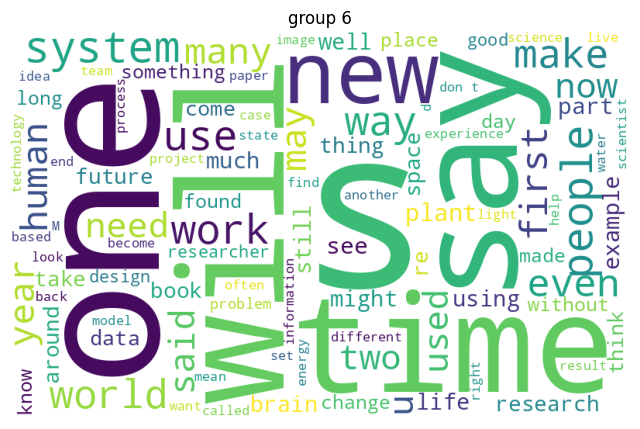

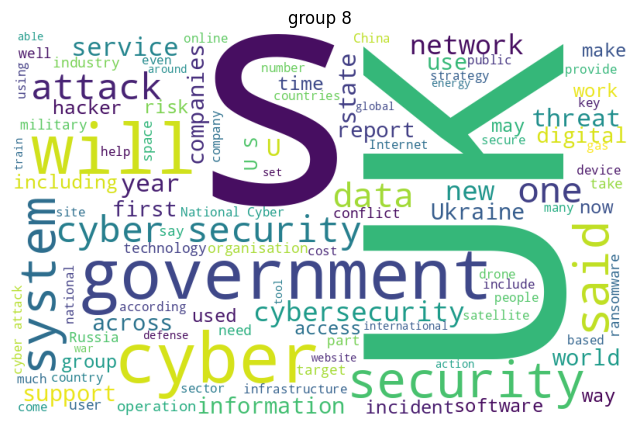

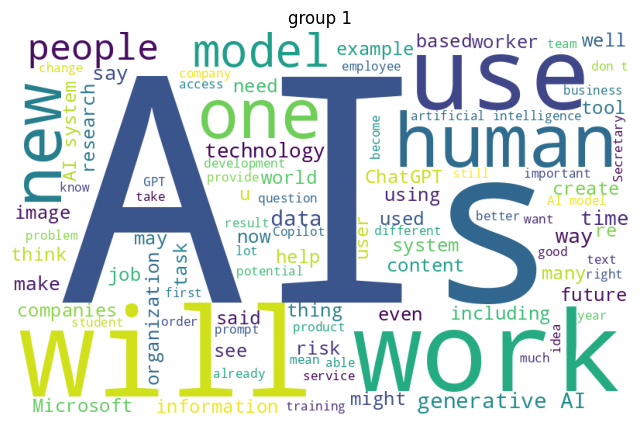

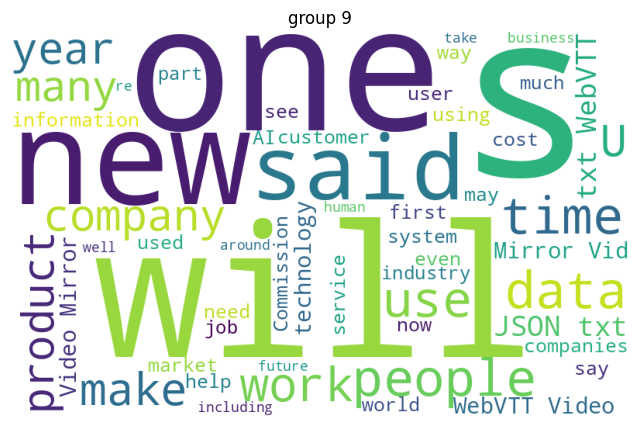

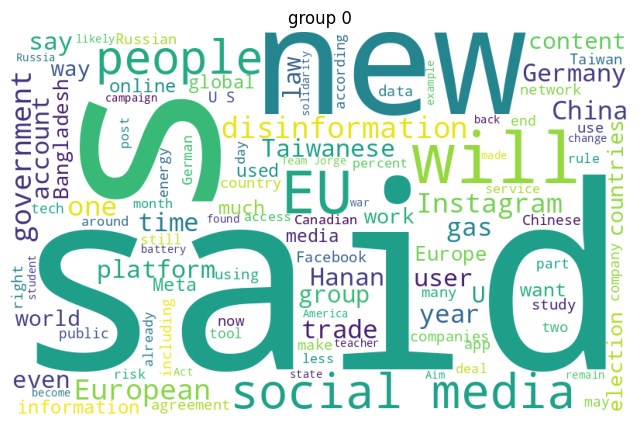

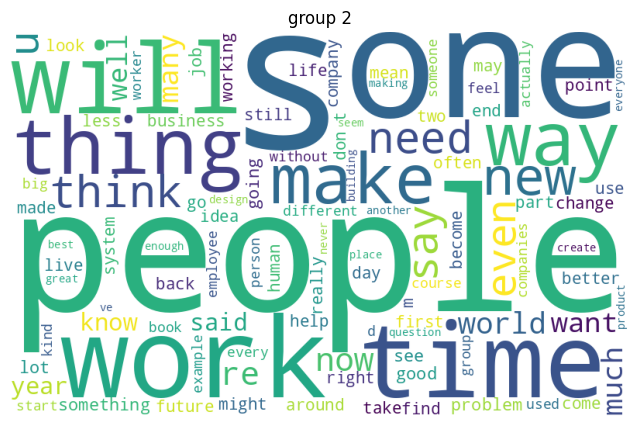

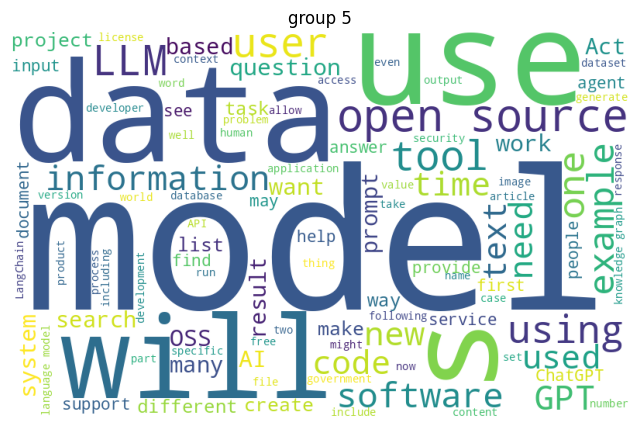

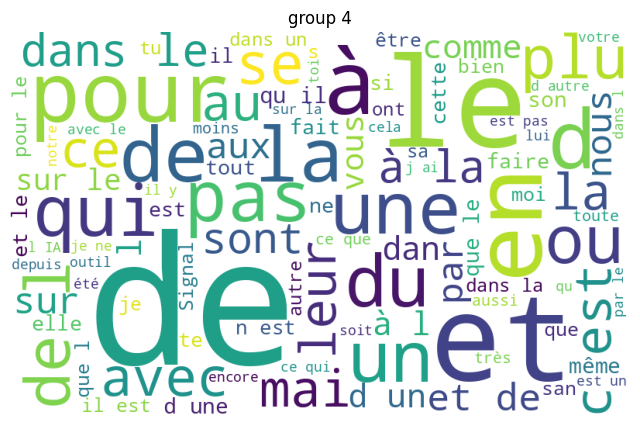

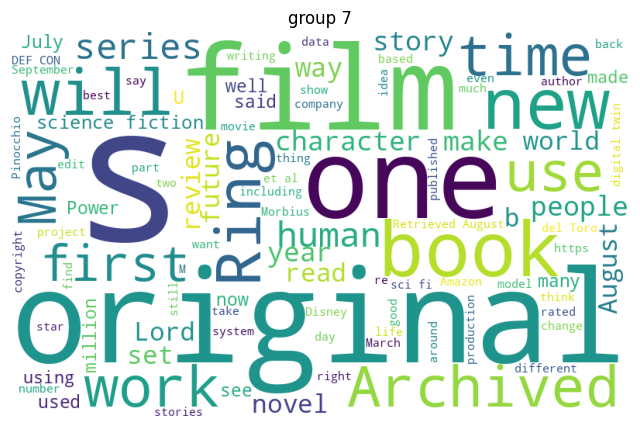

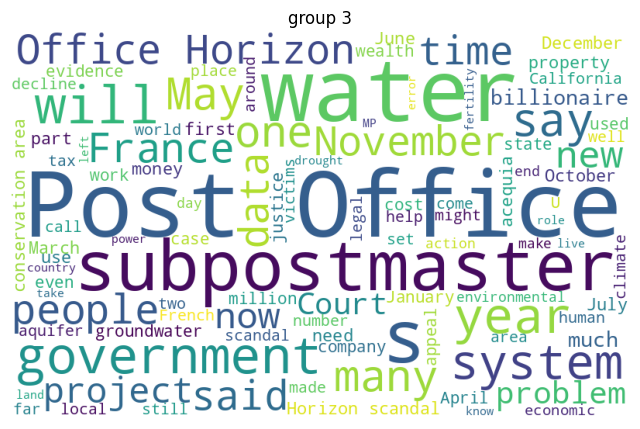

In [21]:
import pandas as pd
new_df=pd.DataFrame({"text":df['content'],"labels":pred_labels})


for i in new_df.labels.unique():
    new_new_df=new_df[new_df.labels==i]
    text="".join(new_new_df.text.tolist())
    word_cloud(text,f"group {i}",f'{i}.jpeg')

In [22]:
# new_df includes the category for errord ones as well.

# No context is given, so the group name is default to the group number.

# We can use the common words found in each group to formulate a title?
new_df.to_csv('grouped_articles.csv')

In [23]:
new_df

,text,labels
0,"When you think of smart binoculars, you imagin...",6
1,We've updated our Privacy and Cookies Policy\n...,8
2,"AI, Imaging, Imagining 2024\nSpells, Naming, A...",1
3,The possibility of mapping out someone’s entir...,9
4,"On the surface, the language we use to describ...",6
...,...,...
1720,China’s growing number of insomniacs are turni...,9
1721,I would say my efficiency is up ~20% since sta...,5
1722,The U.S. government has restricted sales of Nv...,9
1723,My kids and I just played D&D with ChatGPT4 as...,6
